## Batched seq2seq

This my version of pytorch example of seq2seq tutorial: https://github.com/spro/practical-pytorch/blob/master/seq2seq-translation/seq2seq-translation-batched.ipynb

New features:
     - "more batched" seq2seq, initial example had batch size of 1, here bact size could be determined by user, making training faster
    - validation data. Separate dataset for validation is used, this gives much more accurate picture of model training than just using training data
    - refactored code:
            - using dataloaders to get data
            - separate classes for data managmement
            - learner class for model creation and training
    - data tokenization is multicore, making it faster
    - possibility to upload pretrained w

Some of the inspiration and code is from fastai (https://github.com/fastai/fastai), some from the original tutorial (I've referred to fastai if some of the code is taken from there)

#### Example usage

In [1]:
from seq2seq.data.data_manager import Seq2SeqDataManager
from seq2seq.model.seq2seq_learner import Seq2seqLearner
import torch

In [2]:
DEVICE = 'cpu'
MIN_LENGTH = 3 #min sequence length
MAX_LENGTH = 10 #max sequnece length
MIN_COUNT = 3 #min count of token occurence so that it is not marked as unknown

## Get data
data_manager = Seq2SeqDataManager.create_from_txt('data/eng-fra_sub.txt','en', 'fr',
                                                  min_freq=MIN_COUNT, min_ntoks=MIN_LENGTH,
                                                  max_ntoks=MAX_LENGTH, switch_pair=True, device=DEVICE)

kept 1679 sequences from 1680 sequences
kept 1679 sequences from 1680 sequences
kept 1679 sequences from 1679 sequences
kept 1679 sequences from 1679 sequences
kept 184 sequences from 184 sequences
kept 184 sequences from 184 sequences
kept 184 sequences from 184 sequences
kept 184 sequences from 184 sequences


Encoder embedding vector didnt have 285 tokens, example ['!', 'je', 'suis', 'est', '?']
Decoder embedding vector didnt have 269 tokens, example ['i', 'it', '!', 'm', '?']
0:0:11.79 (1 50.0%) loss train: 4.358 loss valid: 3.561


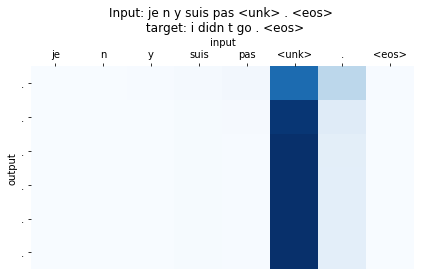

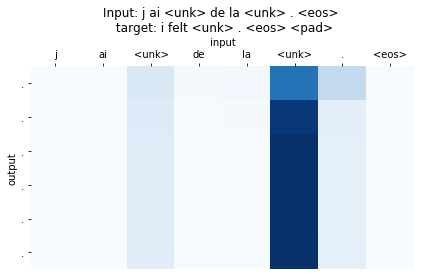

0:0:12.96 (2 100.0%) loss train: 3.359 loss valid: 3.14


In [3]:
hidden_size=50
learner=Seq2seqLearner(data_manager,hidden_size)
learner.fit(2, show_attention_every=5)

In [4]:
# predict on text
original_xtext = 'Je suis sûr.'
original_ytext = 'I am sure.'
predicted_text = learner.predict(original_xtext, device=DEVICE)
print(f'original text: {original_xtext}')
print(f'original answer: {original_ytext}')
print(f'predicted text: {predicted_text}')

original text: Je suis sûr.
original answer: I am sure.
predicted text: i i . <eos>
